<a href="https://colab.research.google.com/github/shiyasAli/Bike-sharing-demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [8]:
#Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Converting the data set into a dataframe.
filepath='/content/drive/MyDrive/Colab Notebooks/Almabetter/Supervised ML_Capastone/SeoulBikeData.csv'
df=pd.read_csv(filepath,encoding='unicode_escape')

In [7]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#Saving a copy of the datafarme into another dataframe.
df_new=df.copy()

In [10]:
df_new.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
#creating list of features and extracting number of features
feature_list=list(df.columns)
print('The list of all the features in the dataset is shown below : \n')
for feature in feature_list:
  print(feature)
  print('\n')
number_of_features=len(feature_list)
number_of_features
print('There are {} features in total'.format(number_of_features))
quantitative_feature_list=feature_list[1:11]
number_of_quantitative_features=len(quantitative_feature_list)
print('Out of those {} , the following {} are quantitative features\n'.format(number_of_features,number_of_quantitative_features))
for feature in quantitative_feature_list:
  print(feature)
  print('\n')


The list of all the features in the dataset is shown below : 

Date


Rented Bike Count


Hour


Temperature(°C)


Humidity(%)


Wind speed (m/s)


Visibility (10m)


Dew point temperature(°C)


Solar Radiation (MJ/m2)


Rainfall(mm)


Snowfall (cm)


Seasons


Holiday


Functioning Day


There are 14 features in total
Out of those 14 , the following 10 are quantitative features

Rented Bike Count


Hour


Temperature(°C)


Humidity(%)


Wind speed (m/s)


Visibility (10m)


Dew point temperature(°C)


Solar Radiation (MJ/m2)


Rainfall(mm)


Snowfall (cm)




In [12]:
#checking for null values.
df.isnull().sum().reset_index().rename(columns={"index":"Feature",0:"Null_count"})

,Feature,Null_count
0,Date,0
1,Rented Bike Count,0
2,Hour,0
3,Temperature(°C),0
4,Humidity(%),0
5,Wind speed (m/s),0
6,Visibility (10m),0
7,Dew point temperature(°C),0
8,Solar Radiation (MJ/m2),0
9,Rainfall(mm),0


In [13]:
#Defining dependent variable and independent variables.
dependent_variable='Rented Bike Count'
print('The dependent variable which we are interested in predicting is '+dependent_variable+'\n')
independent_variables=[i for i in feature_list if i != dependent_variable]
print('List of independent variables\n')
print(independent_variables)
print('\n')
quantitative_independent_variables=[i for i in quantitative_feature_list if i != dependent_variable]
print('List of quantitative independent variables\n')
print(quantitative_independent_variables)
print('\n')
categorical_independent_variables=[i for i in independent_variables if ((i not in quantitative_independent_variables) and (i != 'Date'))]
print('List of categorical independent variables\n')
print(categorical_independent_variables)


The dependent variable which we are interested in predicting is Rented Bike Count

List of independent variables

['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


List of quantitative independent variables

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


List of categorical independent variables

['Seasons', 'Holiday', 'Functioning Day']


[Text(0.5, 1.0, 'Distribution of dependent variable')]

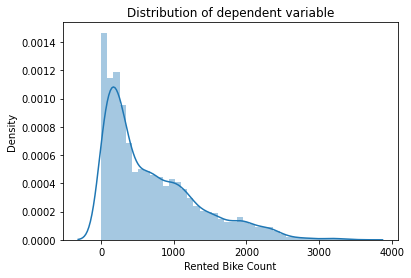

In [14]:
#plotting dependent variable distribution
sns.distplot(df["Rented Bike Count"]).set(title='Distribution of dependent variable')

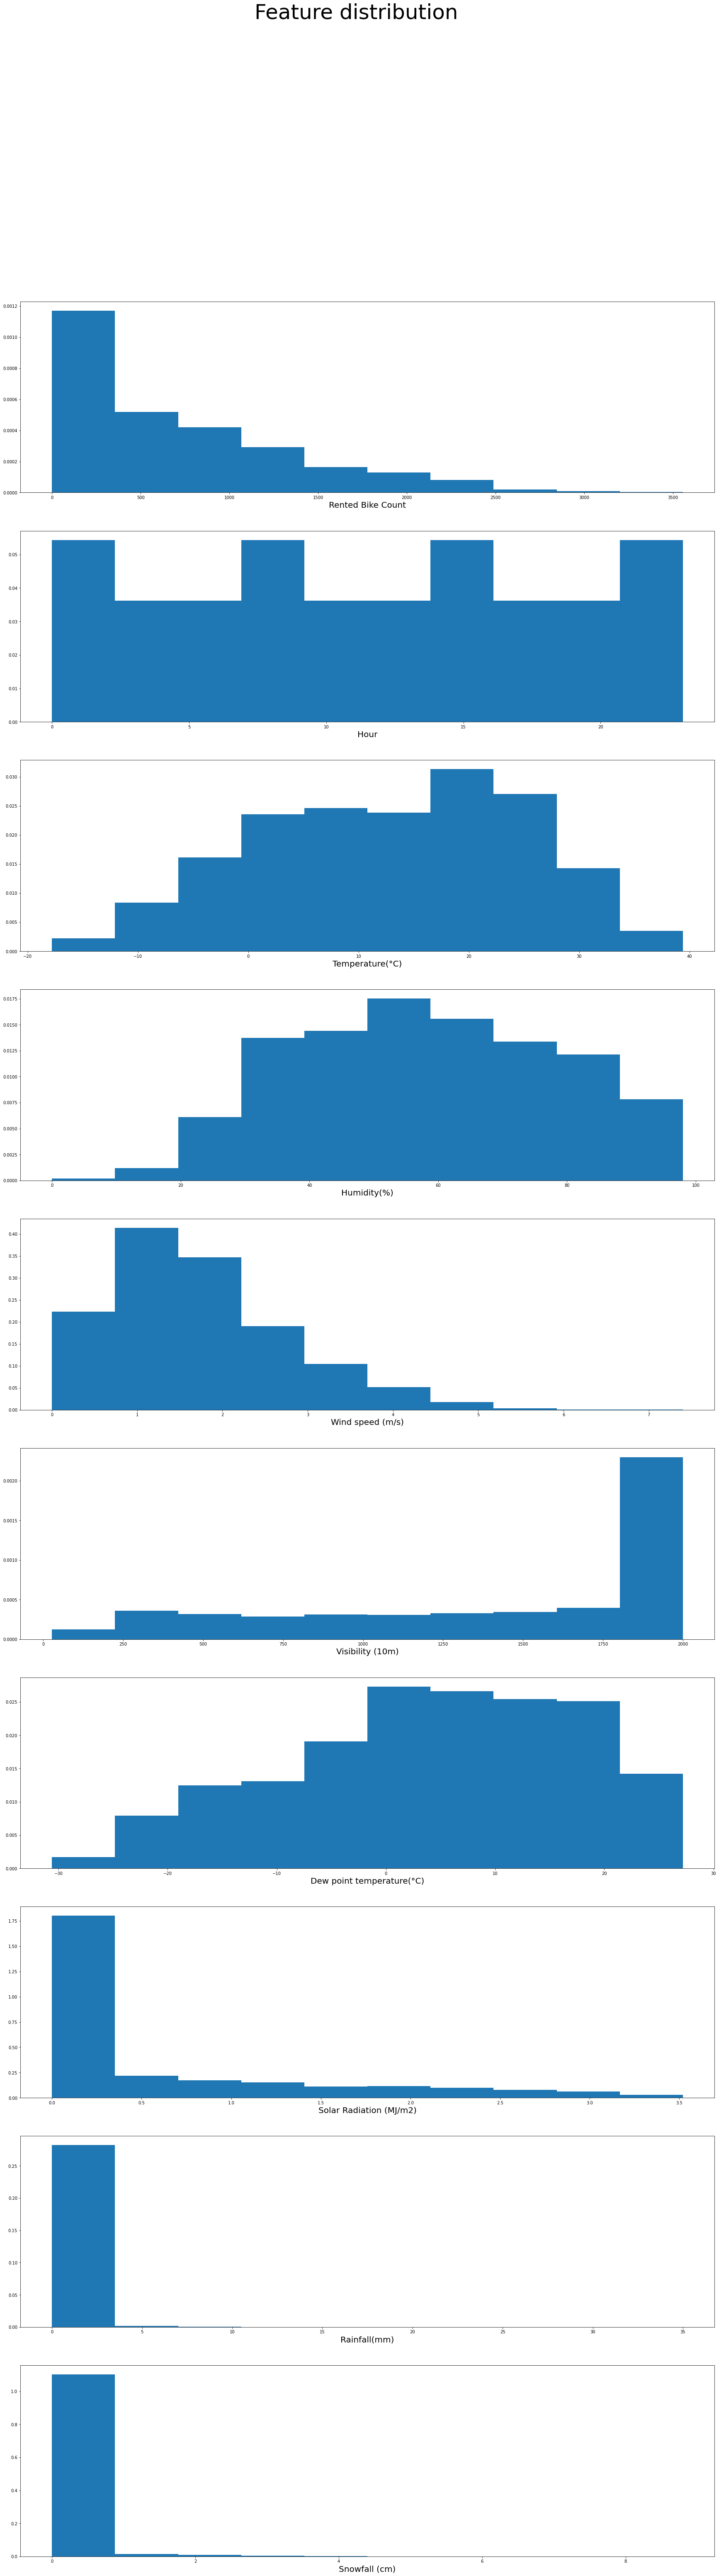

In [16]:
#plotting distribution of all features
fig,ax=plt.subplots(number_of_quantitative_features,1)
plt.suptitle("Feature distribution",fontsize=50)
plt.rcParams['figure.figsize']=(30,100)
for index,feature in enumerate(quantitative_feature_list):
  ax[index].hist(df[feature],density=True)
  ax[index].set_xlabel(feature,fontsize=20)
plt.show()

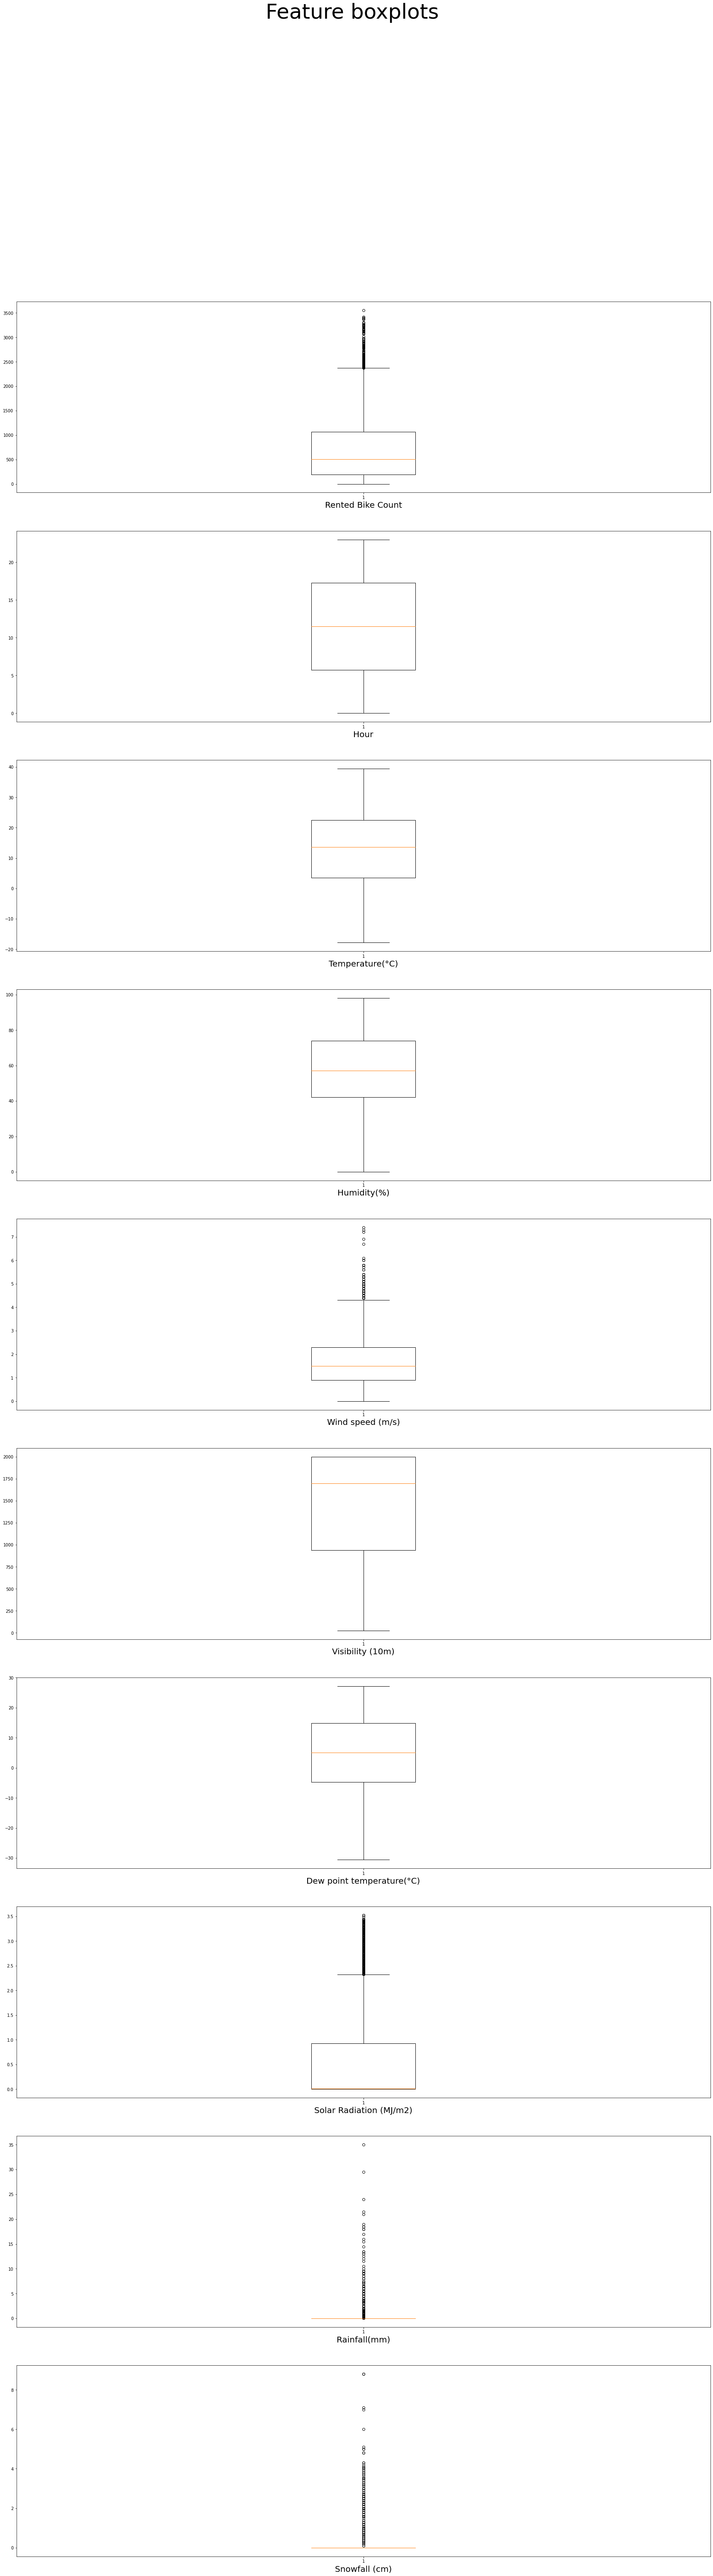

In [17]:
#plotting boxplot of all features
plt.rcParams['figure.figsize']=(30,100)
plt.suptitle("Feature boxplots",fontsize=50)
for index,feature in enumerate(quantitative_feature_list):
  plt.subplot(number_of_quantitative_features,1,index+1)
  plt.boxplot(df[feature])
  plt.xlabel(feature,fontsize=20)

In [18]:
#finding value counts of different features
print('The following table shows count of different values for the Rainfall(mm) feature ')
print('\n')
print(df['Rainfall(mm)'].value_counts().reset_index().sort_values('index'))
print('\n')
print('The following table shows count of different values for the Snowfall(mm) feature ')
print('\n')
print(df['Snowfall (cm)'].value_counts().reset_index().sort_values('index'))
print('\n')
print('The following table shows count of different values for the Solar Radiation (MJ/m2) feature ')
print('\n')
print(df['Solar Radiation (MJ/m2)'].value_counts().reset_index().sort_values('index'))

The following table shows count of different values for the Rainfall(mm) feature 


    index  Rainfall(mm)
0     0.0          8232
4     0.1            46
7     0.2            20
12    0.3             9
9     0.4            16
..    ...           ...
39   21.0             1
40   21.5             1
34   24.0             1
38   29.5             1
54   35.0             1

[61 rows x 2 columns]


The following table shows count of different values for the Snowfall(mm) feature 


    index  Snowfall (cm)
0     0.0           8317
37    0.1              2
11    0.2             15
1     0.3             42
8     0.4             21
4     0.5             34
12    0.6             15
5     0.7             31
6     0.8             22
3     0.9             34
2     1.0             39
26    1.1              3
16    1.2              8
23    1.3              4
40    1.4              2
44    1.5              1
9     1.6             19
31    1.7              3
18    1.8              5
30    1.9          

In [19]:
#finding percentage of zero value in features rainfall and snowfall
Rainfall_zero_percentage=((df['Rainfall(mm)']==0).sum()/df['Rainfall(mm)'].count())*100
snowfall_zero_percentage=((df['Snowfall (cm)']==0).sum()/df['Snowfall (cm)'].count())*100
print('Percentage of zero value in feature Rainfall : {}'.format(Rainfall_zero_percentage))
print('\n')
print('Percentage of zero value in feature Snowfall : {}'.format(snowfall_zero_percentage))

Percentage of zero value in feature Rainfall : 93.97260273972603


Percentage of zero value in feature Snowfall : 94.94292237442923


In [20]:
#converting rainfall and snow fall into binary variable
df['Rainfall(mm)']=df['Rainfall(mm)'].apply(lambda x:0 if x==0 else 1)
df['Snowfall (cm)']=df['Snowfall (cm)'].apply(lambda x:0 if x==0 else 1)

<function matplotlib.pyplot.show(*args, **kw)>

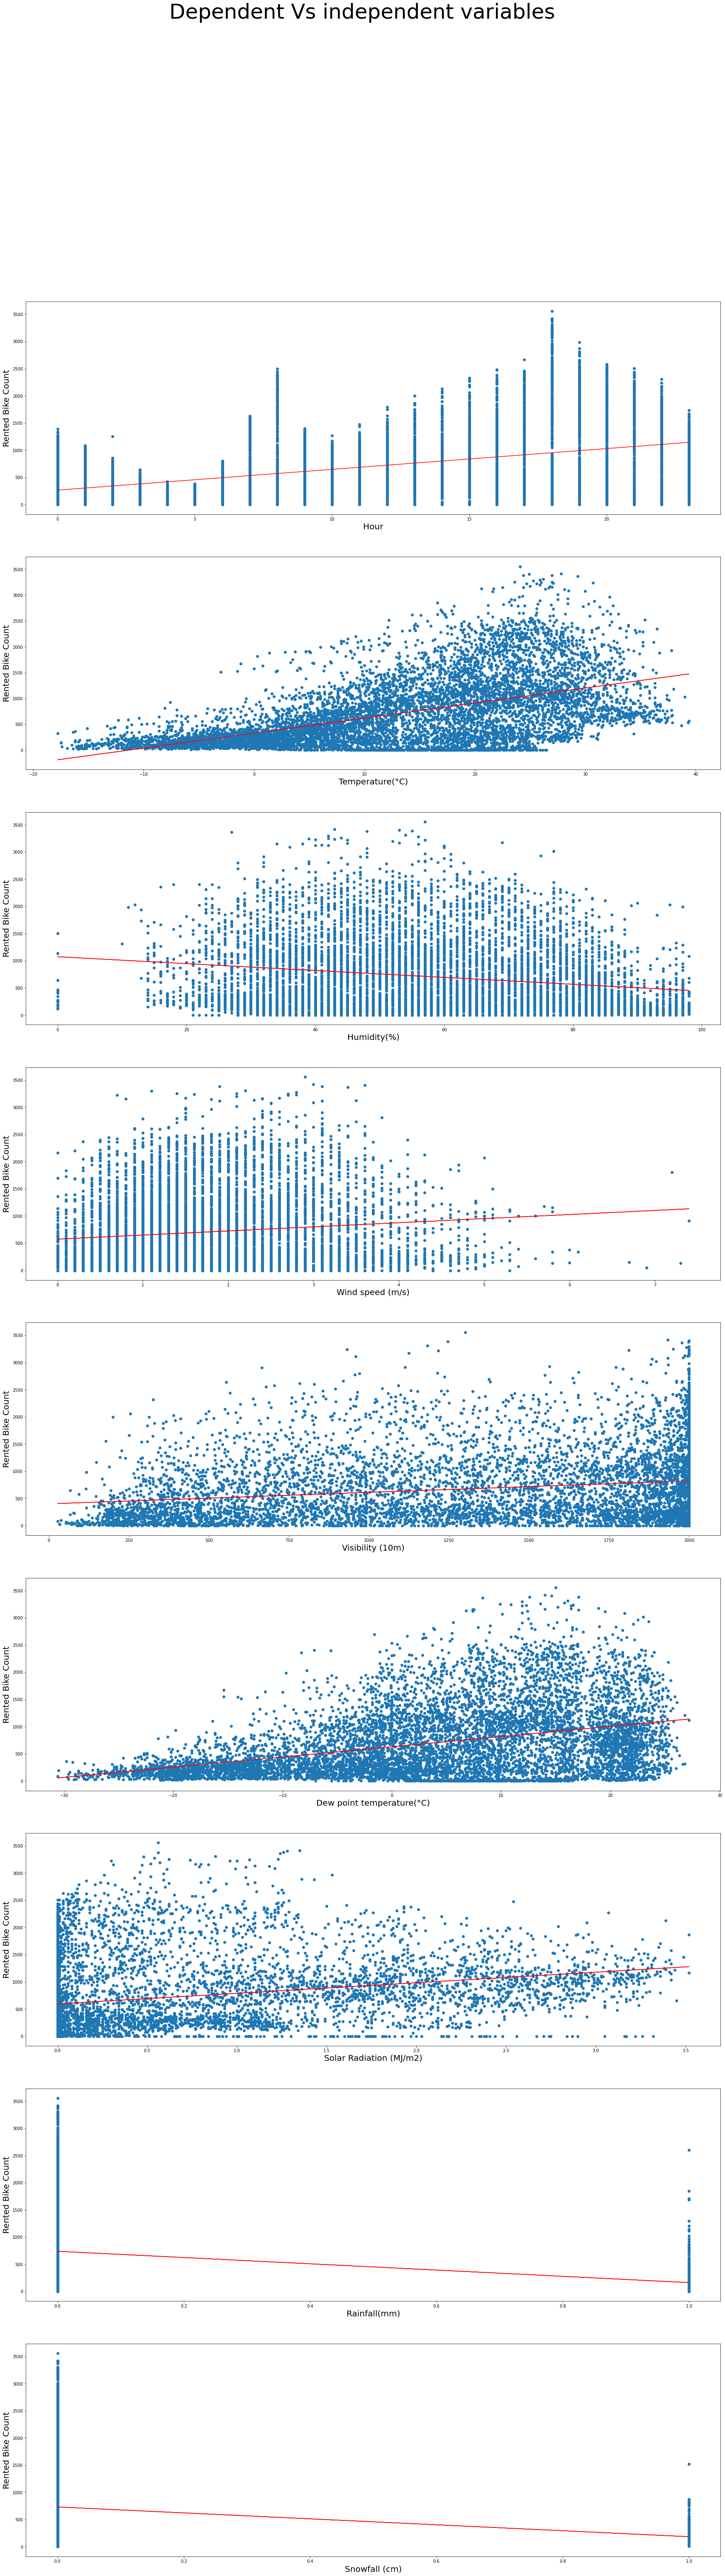

In [21]:
#checking for correlation between dependent and independent variables
fig,ax=plt.subplots(len(quantitative_independent_variables),1)
plt.rcParams['figure.figsize']=(30,100)
plt.suptitle("Dependent Vs independent variables",fontsize=50)
for index,feature in enumerate(quantitative_independent_variables):
  m,b=np.polyfit(df[feature],df[dependent_variable],1)
  ax[index].scatter(df[feature],df[dependent_variable])
  ax[index].plot(df[feature],m*df[feature]+b,color='red')
  ax[index].set_xlabel(feature,fontsize=20)
  ax[index].set_ylabel(dependent_variable,fontsize=20)
plt.show

[Text(0.5, 1.0, 'Correlation between quantitative variables')]

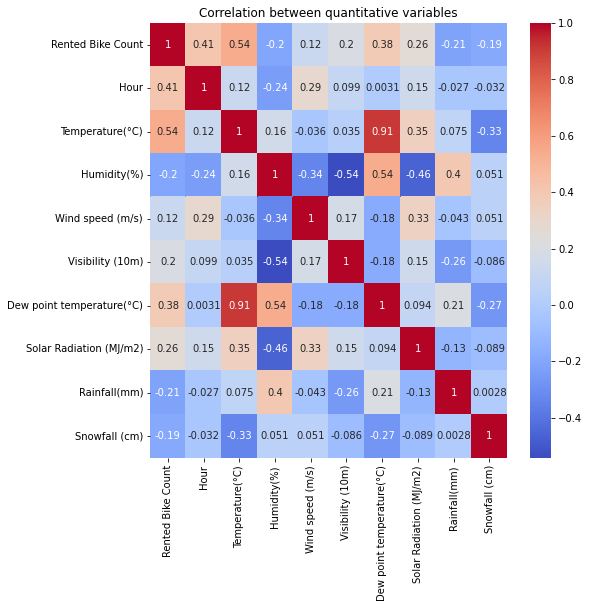

In [22]:
#plotting correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True).set(title='Correlation between quantitative variables')

[Text(0.5, 1.0, 'Season wise distribution of dependent variable')]

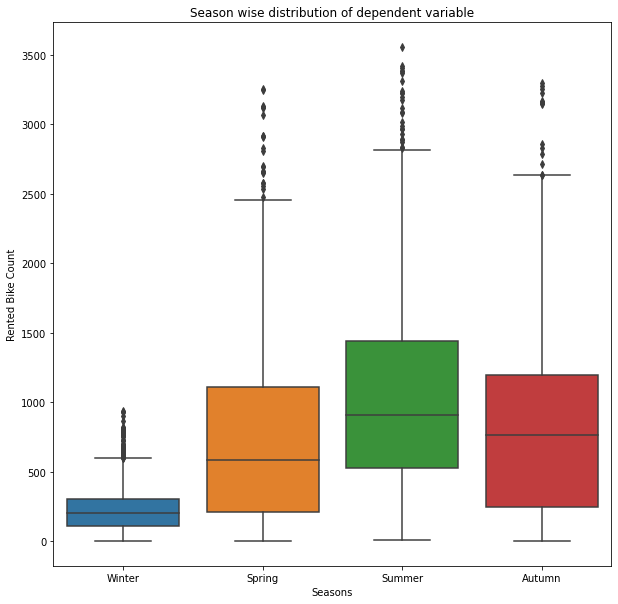

In [23]:
#plotting boxplot for different seasons
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count']).set(title='Season wise distribution of dependent variable')

In [24]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

[Text(0.5, 1.0, 'Distribution according to functional and non-functional day')]

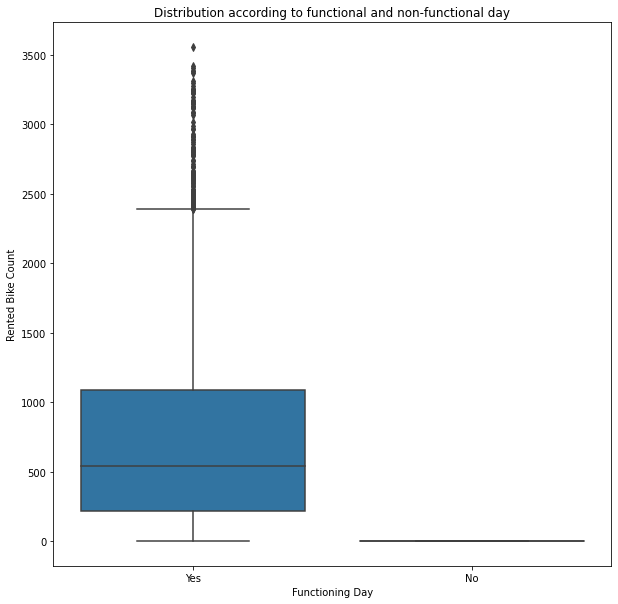

In [25]:
#plotting boxplot of feature functioning day
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Functioning Day'],y=df['Rented Bike Count']).set(title='Distribution according to functional and non-functional day')

In [26]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

[Text(0.5, 1.0, 'Distribution according to holiday and no-holiday')]

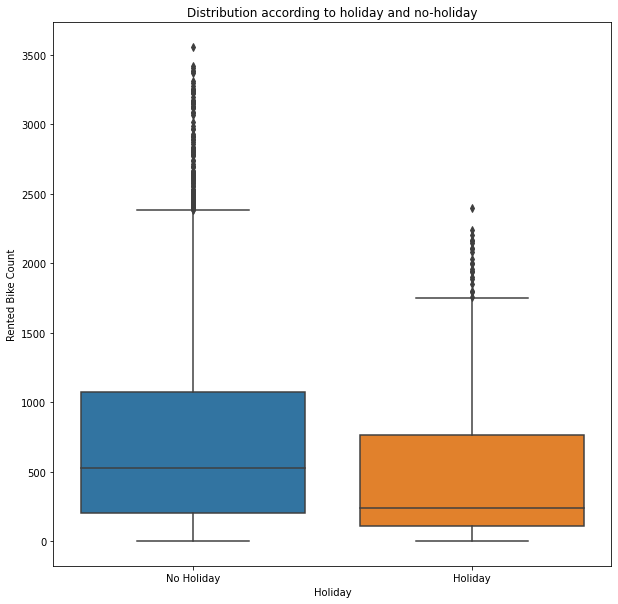

In [27]:
#plotting boxplot for feature Holiday
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count']).set(title='Distribution according to holiday and no-holiday')

In [28]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [29]:
#converting categorical variables into numerical
df['Holiday']=df['Holiday'].apply(lambda x:0 if x=='Holiday' else 1)
df['Functioning Day']=df["Functioning Day"].apply(lambda x:0 if x=='No' else 1)
df['Seasons']=df['Seasons'].apply(lambda x:0 if x=='Winter' else 1)

In [30]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,1


In [31]:
df[['Holiday','Functioning Day']].corr()

,Holiday,Functioning Day
Holiday,1.000000,0.027624
Functioning Day,0.027624,1.000000


[Text(0.5, 1.0, 'Correlation beteween features')]

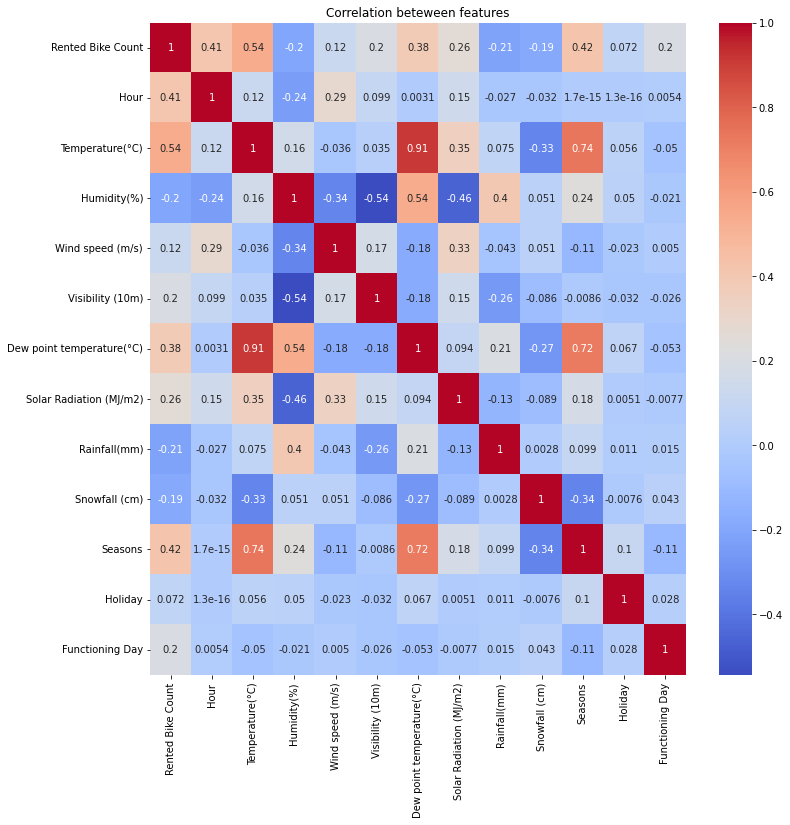

In [32]:
#plotting correlation heatmap for all features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True).set(title='Correlation beteween features')

In [33]:
#converting hour feature into a cyclic variable
df['sin_hr']=df['Hour'].apply(lambda x:np.sin((2*np.pi*x)/24))
df['cos_hr']=df['Hour'].apply(lambda x:np.cos((2*np.pi*x)/24))

Text(0.5, 1.0, 'Hour feature transformed for continuity')

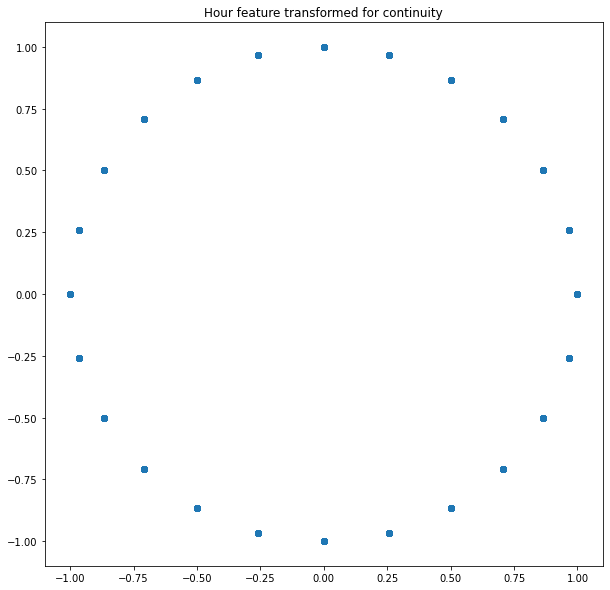

In [34]:
plt.figure.figsize=(10,10)
plt.scatter(df['sin_hr'],df['cos_hr'])
plt.title('Hour feature transformed for continuity')

In [35]:
#defining independent and dependent features for model
y=df[dependent_variable]
X=df[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']]


In [37]:
#finding variance infaltion factor for all features
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Temperature(°C),6.084467
1,Functioning Day,18.042781
2,sin_hr,1.419885
3,cos_hr,2.237730
4,Humidity(%),14.678182
5,Rainfall(mm),1.286023
6,Snowfall (cm),1.259737
7,Wind speed (m/s),4.937877
8,Solar Radiation (MJ/m2),4.392786
9,Visibility (10m),6.878130


In [38]:
#splitting into test and train datasets.
#scaling the values
y=y.values
X=X.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#creating linear regressor object and fitting it into train data values
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [40]:
#predicting on trained values
y_pred_train_lm1=lm1.predict(X_train)

In [41]:
#calculating evaluation metrics
r2_score_lm1_train=r2_score(y_train,y_pred_train_lm1)
mae_lm1_train=mean_absolute_error(y_train,y_pred_train_lm1)
mape_lm1_train=mean_absolute_percentage_error(y_train,y_pred_train_lm1)
mse_lm1_train=mean_squared_error(y_train,y_pred_train_lm1)
rmse_lm1_train=np.sqrt(mse_lm1_train)

In [42]:
#printing evaluation metrics
print('Evaluation metric values for training data of model lm1 are : ')
print('r2score : {}'.format(r2_score_lm1_train))
print('MAPE : {}'.format(mape_lm1_train))
print('MAE : {}'.format(mae_lm1_train))
print('MSE : {}'.format(mse_lm1_train))
print('RMSE : {}'.format(rmse_lm1_train))

Evaluation metric values for training data of model lm1 are : 
r2score : 0.5675853706187196
MAPE : 4.26244765782967e+16
MAE : 318.0523525870652
MSE : 179557.15687417745
RMSE : 423.7418516905988


In [43]:
#predicting on test dataset
y_pred_test_lm1=lm1.predict(X_test)

In [44]:
#calculating evaluation metrics
r2_score_lm1_test=r2_score(y_test,y_pred_test_lm1)
mae_lm1_test=mean_absolute_error(y_test,y_pred_test_lm1)
mape_lm1_test=mean_absolute_percentage_error(y_test,y_pred_test_lm1)
mse_lm1_test=mean_squared_error(y_test,y_pred_test_lm1,)
rmse_lm1_test=np.sqrt(mse_lm1_test)

In [45]:
#printing evaluation metrics
print('Evaluation metric values for test data of model lm1 are : ')
print('r2score : {}'.format(r2_score_lm1_test))
print('MAPE : {}'.format(mape_lm1_test))
print('MAE : {}'.format(mae_lm1_test))
print('MSE : {}'.format(mse_lm1_test))
print('RMSE : {}'.format(rmse_lm1_test))

Evaluation metric values for test data of model lm1 are : 
r2score : 0.5552741147152966
MAPE : 5.322129903204782e+16
MAE : 323.7197170242342
MSE : 186127.8286620091
RMSE : 431.4253454098508


In [46]:
X_train_ols1=sm.add_constant(X_train)
model1=sm.OLS(y_train,X_train_ols1).fit()

In [47]:
#printing model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     834.8
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:29:11   Log-Likelihood:                -52336.
No. Observations:                7008   AIC:                         1.047e+05
Df Residuals:                    6996   BIC:                         1.048e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -352.0697     47.372     -7.432      0.0

In [48]:
#copying the original dataframe into a new dataframe
df1=df_new.copy()

In [49]:
#converting feature values of the new dataframe
df1['Rainfall(mm)']=df1['Rainfall(mm)'].apply(lambda x:0 if x==0 else 1)
df1['Snowfall (cm)']=df1['Snowfall (cm)'].apply(lambda x:0 if x==0 else 1)
df1['Holiday']=df1['Holiday'].apply(lambda x:0 if x=='Holiday' else 1)
df1['Functioning Day']=df1["Functioning Day"].apply(lambda x:0 if x=='No' else 1)
df1['sin_hr']=df1['Hour'].apply(lambda x:np.sin((2*np.pi*x)/24))
df1['cos_hr']=df1['Hour'].apply(lambda x:np.cos((2*np.pi*x)/24))

In [50]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sin_hr,cos_hr
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,1,1,0.000000,1.000000
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,1,1,0.258819,0.965926
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,1,1,0.500000,0.866025
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,1,1,0.707107,0.707107
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,1,1,0.866025,0.500000


In [51]:
#defining independent features for next model
X=df1[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']]

In [52]:
X.head()

,Temperature(°C),Functioning Day,sin_hr,cos_hr,Humidity(%),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Solar Radiation (MJ/m2),Visibility (10m),Seasons
0,-5.2,1,0.000000,1.000000,37,0,0,2.2,0.0,2000,Winter
1,-5.5,1,0.258819,0.965926,38,0,0,0.8,0.0,2000,Winter
2,-6.0,1,0.500000,0.866025,39,0,0,1.0,0.0,2000,Winter
3,-6.2,1,0.707107,0.707107,40,0,0,0.9,0.0,2000,Winter
4,-6.0,1,0.866025,0.500000,36,0,0,2.3,0.0,2000,Winter


In [53]:
#creating dummy features for season variable
X=pd.get_dummies(X)

In [54]:
X.head()

,Temperature(°C),Functioning Day,sin_hr,cos_hr,Humidity(%),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Solar Radiation (MJ/m2),Visibility (10m),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-5.2,1,0.000000,1.000000,37,0,0,2.2,0.0,2000,0,0,0,1
1,-5.5,1,0.258819,0.965926,38,0,0,0.8,0.0,2000,0,0,0,1
2,-6.0,1,0.500000,0.866025,39,0,0,1.0,0.0,2000,0,0,0,1
3,-6.2,1,0.707107,0.707107,40,0,0,0.9,0.0,2000,0,0,0,1
4,-6.0,1,0.866025,0.500000,36,0,0,2.3,0.0,2000,0,0,0,1


In [55]:
#calculating variance inflation factor
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Temperature(°C),5.479720
1,Functioning Day,1.080583
2,sin_hr,1.504123
3,cos_hr,2.276456
4,Humidity(%),2.929697
5,Rainfall(mm),1.238938
6,Snowfall (cm),1.208891
7,Wind speed (m/s),1.395786
8,Solar Radiation (MJ/m2),3.348970
9,Visibility (10m),1.705378


In [56]:
#splitting the data set into train and test dataset.
#scaling the X values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#creating linear regressor object and fitting the training values to it
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [58]:
#predicting train values
y_pred_train_lm2=lm2.predict(X_train)

In [59]:
#calculating evaluation metrics
r2_score_lm2_train=r2_score(y_train,y_pred_train_lm2)
mae_lm2_train=mean_absolute_error(y_train,y_pred_train_lm2)
mape_lm2_train=mean_absolute_percentage_error(y_train,y_pred_train_lm2)
mse_lm2_train=mean_squared_error(y_train,y_pred_train_lm2)
rmse_lm2_train=np.sqrt(mse_lm2_train)

In [60]:
#printing evaluation metrics
print('Evaluation metric values for training data of model lm2 are : ')
print('r2score : {}'.format(r2_score_lm2_train))
print('MAPE : {}'.format(mape_lm2_train))
print('MAE : {}'.format(mae_lm2_train))
print('MSE : {}'.format(mse_lm2_train))
print('RMSE : {}'.format(rmse_lm2_train))

Evaluation metric values for training data of model lm2 are : 
r2score : 0.5701221648809373
MAPE : 4.3000443788017736e+16
MAE : 316.54380707762556
MSE : 178503.7707619863
RMSE : 422.4970659803288


In [61]:
#predicting test values
y_pred_test_lm2=lm2.predict(X_test)

In [62]:
#calculating evaluation metrics
r2_score_lm2_test=r2_score(y_test,y_pred_test_lm2)
mae_lm2_test=mean_absolute_error(y_test,y_pred_test_lm2)
mape_lm2_test=mean_absolute_percentage_error(y_test,y_pred_test_lm2)
mse_lm2_test=mean_squared_error(y_test,y_pred_test_lm2)
rmse_lm2_test=np.sqrt(mse_lm2_test)

In [63]:
#printing evaluation metrics
print('Evaluation metric values for test data of model lm2 are : ')
print('r2score : {}'.format(r2_score_lm2_test))
print('MAPE : {}'.format(mape_lm2_test))
print('MAE : {}'.format(mae_lm2_test))
print('MSE : {}'.format(mse_lm2_test))
print('RMSE : {}'.format(rmse_lm2_test))

Evaluation metric values for test data of model lm2 are : 
r2score : 0.5593656372134984
MAPE : 5.4418495497393496e+16
MAE : 321.42180365296804
MSE : 184415.43407534246
RMSE : 429.43618160949416


In [64]:
X_train_ols2=sm.add_constant(X_train)
model2=sm.OLS(y_train,X_train_ols2).fit()

In [65]:
#printing model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     713.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:35:44   Log-Likelihood:                -52315.
No. Observations:                7008   AIC:                         1.047e+05
Df Residuals:                    6994   BIC:                         1.048e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -126.8860     47.249     -2.685      0.0

In [66]:
#defining independent and dependent features for next model
y=df[dependent_variable]
X=df[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']]

In [67]:
#splitting into train,test dataset and scaling independent variables
y=y.values
X=X.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [68]:
#creating a lasso regressor object
#performing a grid search to tune the hyperparameter 'alpha' of lasso regressor
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [69]:
#printing the best value of hyperparameter 'alpha'
print('selected value for parameter alpha in lasso is {}'.format(lasso_regressor.best_params_['alpha']))

selected value for parameter alpha in lasso is 0.0001


In [70]:
#predicting train values using the lasso regressor
y_pred_train_lasso = lasso_regressor.predict(X_train)

In [71]:
#calculating evaluation metrics
r2_score_lasso_train=r2_score(y_train,y_pred_train_lasso)
mae_lasso_train=mean_absolute_error(y_train,y_pred_train_lasso)
mape_lasso_train=mean_absolute_percentage_error(y_train,y_pred_train_lasso)
mse_lasso_train=mean_squared_error(y_train,y_pred_train_lasso)
rmse_lasso_train=np.sqrt(mse_lasso_train)

In [72]:
#printing evaluation metrics
print('Evaluation metric values for training data of model lasso are : ')
print('r2score : {}'.format(r2_score_lasso_train))
print('MAPE : {}'.format(mape_lasso_train))
print('MAE : {}'.format(mae_lasso_train))
print('MSE : {}'.format(mse_lasso_train))
print('RMSE : {}'.format(rmse_lasso_train))

Evaluation metric values for training data of model lasso are : 
r2score : 0.5675853706069923
MAPE : 4.262431886891047e+16
MAE : 318.05221167973366
MSE : 179557.15687904714
RMSE : 423.7418516963449


In [73]:
#predicting test values using lasso regressor
y_pred_test_lasso=lasso_regressor.predict(X_test)

In [74]:
#calculating evaluation metrics
r2_score_lasso_test=r2_score(y_test,y_pred_test_lasso)
mae_lasso_test=mean_absolute_error(y_test,y_pred_test_lasso)
mape_lasso_test=mean_absolute_percentage_error(y_test,y_pred_test_lasso)
mse_lasso_test=mean_squared_error(y_test,y_pred_test_lasso)
rmse_lasso_test=np.sqrt(mse_lasso_test)

In [75]:
#printing evaluation metrics
print('Evaluation metric values for test data of model lasso are : ')
print('r2score : {}'.format(r2_score_lasso_test))
print('MAPE : {}'.format(mape_lasso_test))
print('MAE : {}'.format(mae_lasso_test))
print('MSE : {}'.format(mse_lasso_test))
print('RMSE : {}'.format(rmse_lasso_test))

Evaluation metric values for test data of model lasso are : 
r2score : 0.555274129431548
MAPE : 5.322118227908027e+16
MAE : 323.7195429515437
MSE : 186127.82250292553
RMSE : 431.42533827178664


In [76]:
#creating a ridge regressor object
#performing grid search to tune the hyperparameter 'alpha' of ridge regression
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [77]:
#printing the best value for hyperparameter 'alpha'
print('selected value for parameter alpha in Ridge is {}'.format(ridge_regressor.best_params_['alpha']))

selected value for parameter alpha in Ridge is 0.01


In [78]:
#predicting train values
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [79]:
#calculating evaluation metrics
r2_score_ridge_train=r2_score(y_train,y_pred_train_ridge)
mae_ridge_train=mean_absolute_error(y_train,y_pred_train_ridge)
mape_ridge_train=mean_absolute_percentage_error(y_train,y_pred_train_ridge)
mse_ridge_train=mean_squared_error(y_train,y_pred_train_ridge)
rmse_ridge_train=np.sqrt(mse_ridge_train)

In [80]:
#printing evaluation metrics
print('Evaluation metric values for training data of model ridge are : ')
print('r2score : {}'.format(r2_score_ridge_train))
print('MAPE : {}'.format(mape_ridge_train))
print('MAE : {}'.format(mae_ridge_train))
print('MSE : {}'.format(mse_ridge_train))
print('RMSE : {}'.format(rmse_ridge_train))

Evaluation metric values for training data of model ridge are : 
r2score : 0.5675853696127846
MAPE : 4.262313433145603e+16
MAE : 318.05135877966626
MSE : 179557.15729188497
RMSE : 423.74185218347856


In [81]:
#predicting test values
y_pred_test_ridge=ridge_regressor.predict(X_test)

In [82]:
#calculating evaluation metrics
r2_score_ridge_test=r2_score(y_test,y_pred_test_ridge)
mae_ridge_test=mean_absolute_error(y_test,y_pred_test_ridge)
mape_ridge_test=mean_absolute_percentage_error(y_test,y_pred_test_ridge)
mse_ridge_test=mean_squared_error(y_test,y_pred_test_ridge)
rmse_ridge_test=np.sqrt(mse_ridge_test)

In [83]:
#printing evaluation metrics
print('Evaluation metric values for test data of model ridge are : ')
print('r2score : {}'.format(r2_score_ridge_test))
print('MAPE : {}'.format(mape_ridge_test))
print('MAE : {}'.format(mae_ridge_test))
print('MSE : {}'.format(mse_ridge_test))
print('RMSE : {}'.format(rmse_ridge_test))

Evaluation metric values for test data of model ridge are : 
r2score : 0.5552745264791135
MAPE : 5.322046840169924e+16
MAE : 323.7184051537816
MSE : 186127.65632955063
RMSE : 431.42514568526326


In [85]:
#finding first and third quartile values of dependent variable
#calculating inter quartile range
#finding and printing number of outliers
q1=np.percentile(df['Rented Bike Count'],25)
q3=np.percentile(df['Rented Bike Count'],75)
IQR=q3-q1
print('Inter quartile range is {}\n'.format(IQR))
outlier_cap=q3+1.5*IQR
outlier_cap
outlier_count=(df['Rented Bike Count']>outlier_cap).sum()
print('number of outliers in dependent variable are {}'.format(outlier_count))


Inter quartile range is 874.25

number of outliers in dependent variable are 158


In [86]:
#creating a dataset with no outliers in dependent variable
df_no_outlier=df[df['Rented Bike Count']<outlier_cap]

In [87]:
#splitting into train,test and scaling independent values
y=df_no_outlier[dependent_variable].values
X=df_no_outlier[['Temperature(°C)','Functioning Day','sin_hr','cos_hr','Humidity(%)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)','Seasons']].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
#creating a linear regressor object and fitting the values without outliers to it
lm_no_outlier=LinearRegression()
lm_no_outlier.fit(X_train,y_train)

LinearRegression()

In [89]:
#predicting train values
y_pred_train_no_outlier=lm_no_outlier.predict(X_train)

In [90]:
#calculating evaluation metrics
r2_score_no_outlier_train=r2_score(y_train,y_pred_train_no_outlier)
mae_no_outlier_train=mean_absolute_error(y_train,y_pred_train_no_outlier)
mape_no_outlier_train=mean_absolute_percentage_error(y_train,y_pred_train_no_outlier)
mse_no_outlier_train=mean_squared_error(y_train,y_pred_train_no_outlier)
rmse_no_outlier_train=np.sqrt(mse_no_outlier_train)

In [91]:
#printing evaluation metrics
print('Evaluation metric values for training data of model no_outlier are : ')
print('r2score : {}'.format(r2_score_no_outlier_train))
print('MAPE : {}'.format(mape_no_outlier_train))
print('MAE : {}'.format(mae_no_outlier_train))
print('MSE : {}'.format(mse_no_outlier_train))
print('RMSE : {}'.format(rmse_no_outlier_train))

Evaluation metric values for training data of model no_outlier are : 
r2score : 0.568593277402419
MAPE : 4.042037446921144e+16
MAE : 296.57519589122313
MSE : 151105.02828066394
RMSE : 388.7223022681667


In [92]:
#predicting test values
y_pred_test_no_outlier=lm_no_outlier.predict(X_test)

In [93]:
#calculating evaluation metrics
r2_score_no_outlier_test=r2_score(y_test,y_pred_test_no_outlier)
mae_no_outlier_test=mean_absolute_error(y_test,y_pred_test_no_outlier)
mape_no_outlier_test=mean_absolute_percentage_error(y_test,y_pred_test_no_outlier)
mse_no_outlier_test=mean_squared_error(y_test,y_pred_test_no_outlier)
rmse_no_outlier_test=np.sqrt(mse_no_outlier_test)

In [94]:
#printing evaluation metrics
print('Evaluation metric values for test data of model no_outlier are : ')
print('r2score : {}'.format(r2_score_no_outlier_test))
print('MAPE : {}'.format(mape_no_outlier_test))
print('MAE : {}'.format(mae_no_outlier_test))
print('MSE : {}'.format(mse_no_outlier_test))
print('RMSE : {}'.format(rmse_no_outlier_test))

Evaluation metric values for test data of model no_outlier are : 
r2score : 0.564046254520314
MAPE : 4.570451726286935e+16
MAE : 290.49086757104806
MSE : 146742.43492137556
RMSE : 383.06975203137034


In [95]:
#one hot encoding the feature 'Season'
enc=OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df_new[['Seasons']]).toarray())

In [96]:
enc_df

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8755,1.0,0.0,0.0,0.0
8756,1.0,0.0,0.0,0.0
8757,1.0,0.0,0.0,0.0
8758,1.0,0.0,0.0,0.0


In [97]:
enc_df.rename(columns={0:'winter',1:'spring',2:'summer',3:'autumn'},inplace=True)
enc_df

,winter,spring,summer,autumn
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8755,1.0,0.0,0.0,0.0
8756,1.0,0.0,0.0,0.0
8757,1.0,0.0,0.0,0.0
8758,1.0,0.0,0.0,0.0


In [99]:
#merging the onehot encoded dataframe into original dataframe
df2=df_new.join(enc_df)

In [100]:
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,winter,spring,summer,autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0.0,0.0,0.0,1.0


In [101]:
#converting the feature 'Hour' into a cyclic variable
#coverting the feature 'Functional Day' into numerical variable
#dropping other categorical values
df2['sin_hr']=df2['Hour'].apply(lambda x:np.sin((2*np.pi*x)/24))
df2['cos_hr']=df2['Hour'].apply(lambda x:np.cos((2*np.pi*x)/24))
df2.drop(labels=['Date','Hour','Dew point temperature(°C)','Seasons','Holiday'],axis=1,inplace=True)
df2['Functioning Day']=df2['Functioning Day'].apply(lambda x:1 if x=='Yes' else 0)
df2.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,winter,spring,summer,autumn,sin_hr,cos_hr
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.000000,1.000000
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.258819,0.965926
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.500000,0.866025
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.707107,0.707107
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.866025,0.500000


In [102]:
#defining the independent variables for the decision tree model
independent_variables_decisionTree=[variable for variable in df2.columns if variable!=dependent_variable]
print('independent variables for decision tree model are\n')
independent_variables_decisionTree

independent variables for decision tree model are



['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Functioning Day',
 'winter',
 'spring',
 'summer',
 'autumn',
 'sin_hr',
 'cos_hr']

In [103]:
#creating arandom forest regressor object
rf=RandomForestRegressor(random_state=42)

In [104]:
#splitting the dataset into into train and test values
X=df2[independent_variables_decisionTree].values
y=df2[dependent_variable].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
#creating parameter dictionary for random search
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features=['auto','sqrt',8,12]
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10,20,30,40,50]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [106]:
#performing randomsearch for tuning the hyperparameters of random forest model with a 3 fold cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [107]:
#creating a parameter dictionary for gridsearch and fine tune hyperparameters.
param_grid = {
    'bootstrap': [True],
    'max_depth': [95,100,105],
    'max_features': [7,8,9],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [2000,2200,2500]
}

In [108]:
#performing a grid search with 3 fold cross-validation
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_grid.fit(X_train,y_train)

In [107]:
#best hyperparameters of the model
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 95,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [111]:
#fitting the model with best hyperparameters
rf=RandomForestRegressor(n_estimators=2000,max_depth=95,min_samples_split=3,min_samples_leaf=1,max_features=7,bootstrap=True,random_state=42)
rf.fit(X_train,y_train)

In [115]:
#predicting train values
y_pred_train_rfgrid=rf.predict(X_train)

In [116]:
#calculating evaluation metrics
r2_score_rfgrid_train=r2_score(y_train,y_pred_train_rfgrid)
mae_rfgrid_train=mean_absolute_error(y_train,y_pred_train_rfgrid)
mape_rfgrid_train=mean_absolute_percentage_error(y_train,y_pred_train_rfgrid)
mse_rfgrid_train=mean_squared_error(y_train,y_pred_train_rfgrid)
rmse_rfgrid_train=np.sqrt(mse_rfgrid_train)

In [117]:
#printing evaluation metrics
print('Evaluation metric values for training data of model rfgrid are : ')
print('r2score : {}'.format(r2_score_rfgrid_train))
print('MAPE : {}'.format(mape_rfgrid_train))
print('MAE : {}'.format(mae_rfgrid_train))
print('MSE : {}'.format(mse_rfgrid_train))
print('RMSE : {}'.format(rmse_rfgrid_train))

Evaluation metric values for training data of model rfgrid are : 
r2score : 0.9794238911147823
MAPE : 3055395256244203.5
MAE : 57.281209034464425
MSE : 8544.085606561417
RMSE : 92.43422313494833


In [119]:
#predicting test values
y_pred_test_rfgrid=rf.predict(X_test)

In [120]:
#calculating evaluation metrics
r2_score_rfgrid_test=r2_score(y_test,y_pred_test_rfgrid)
mae_rfgrid_test=mean_absolute_error(y_test,y_pred_test_rfgrid)
mape_rfgrid_test=mean_absolute_percentage_error(y_test,y_pred_test_rfgrid)
mse_rfgrid_test=mean_squared_error(y_test,y_pred_test_rfgrid)
rmse_rfgrid_test=np.sqrt(mse_rfgrid_test)

In [121]:
#printing evaluation metrics
print('Evaluation metric values for test data of model rfgrid are : ')
print('r2score : {}'.format(r2_score_rfgrid_test))
print('MAPE : {}'.format(mape_rfgrid_test))
print('MAE : {}'.format(mae_rfgrid_test))
print('MSE : {}'.format(mse_rfgrid_test))
print('RMSE : {}'.format(rmse_rfgrid_test))

Evaluation metric values for test data of model rfgrid are : 
r2score : 0.8727716478923679
MAPE : 1.5061053801474918e+16
MAE : 142.97490707404597
MSE : 53247.939248868424
RMSE : 230.75514999424917


In [122]:
#creating Gradient boost regressor object
gb=GradientBoostingRegressor(random_state=42)

In [ ]:
#parameter list for performing random search of hyper parameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features=['auto','sqrt',8,12]
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10,20,30,40,50]
min_samples_leaf=[1,2,4]
learning_rate=[.01,.05,.1,.2]
 
gb_random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'learning_rate':learning_rate
}

In [ ]:
#performing random search with 3 fold cross-validation for tuning hyperparameter
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train,y_train)

In [ ]:
#best parameter found from random search
gb_random.best_params_

In [123]:
#parameter list for grid search
gb_param_grid={
   'n_estimators': [500,522,545],
 'min_samples_split': [25,30,35],
 'min_samples_leaf': [4,5],
 'max_features': ['sqrt'],
 'max_depth': [105,110],
 'learning_rate': [0.001,0.005,0.01]
}

In [124]:
#performing grid search to fine tune hyperparameters with 3 fold cross-validation
gb_grid=GridSearchCV(estimator = gb, param_grid = gb_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
gb_grid.fit(X_train,y_train)

In [126]:
#the best hyperparameters found from grid search
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 105,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 35,
 'n_estimators': 545}

In [127]:
#fitting the model with best hyperparameters
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=545,min_samples_split=35,min_samples_leaf=5,max_depth=105,max_features='sqrt',random_state=42)
gb.fit(X_train,y_train)

In [129]:
#predicting train values
y_pred_train_gbgrid=gb_grid.predict(X_train,)

In [130]:
#calculating evaluation metric
r2_score_gbgrid_train=r2_score(y_train,y_pred_train_gbgrid)
mae_gbgrid_train=mean_absolute_error(y_train,y_pred_train_gbgrid)
mape_gbgrid_train=mean_absolute_percentage_error(y_train,y_pred_train_gbgrid)
mse_gbgrid_train=mean_squared_error(y_train,y_pred_train_gbgrid)
rmse_gbgrid_train=np.sqrt(mse_gbgrid_train)

In [131]:
#printing evaluation metric
print('Evaluation metric values for training data of model gbgrid are : ')
print('r2score : {}'.format(r2_score_gbgrid_train))
print('MAPE : {}'.format(mape_gbgrid_train))
print('MAE : {}'.format(mae_gbgrid_train))
print('MSE : {}'.format(mse_gbgrid_train))
print('RMSE : {}'.format(rmse_gbgrid_train))

Evaluation metric values for training data of model gbgrid are : 
r2score : 0.9723921302260865
MAPE : 2977120178911496.0
MAE : 65.75716369404859
MSE : 11463.975238417423
RMSE : 107.06995488192484


In [132]:
#predicting test values
y_pred_test_gbgrid=gb.predict(X_test)

In [133]:
#calculating evaluation metric
r2_score_gbgrid_test=r2_score(y_test,y_pred_test_gbgrid)
mae_gbgrid_test=mean_absolute_error(y_test,y_pred_test_gbgrid)
mape_gbgrid_test=mean_absolute_percentage_error(y_test,y_pred_test_gbgrid)
mse_gbgrid_test=mean_squared_error(y_test,y_pred_test_gbgrid)
rmse_gbgrid_test=np.sqrt(mse_gbgrid_test)

In [134]:
#printing evaluation metric
print('Evaluation metric values for test data of model gbgrid are : ')
print('r2score : {}'.format(r2_score_gbgrid_test))
print('MAPE : {}'.format(mape_gbgrid_test))
print('MAE : {}'.format(mae_gbgrid_test))
print('MSE : {}'.format(mse_gbgrid_test))
print('RMSE : {}'.format(rmse_gbgrid_test))

Evaluation metric values for test data of model gbgrid are : 
r2score : 0.8615953890173812
MAPE : 1.9341887545268868e+16
MAE : 147.28956303800894
MSE : 57925.45604246385
RMSE : 240.67707834869495


In [136]:
#creating a dictionary of training data set evaluation metrics for all models
train_metric_dict={
    'r2score':[r2_score_lm1_train,r2_score_lm2_train,r2_score_lasso_train,r2_score_ridge_train,r2_score_no_outlier_train,r2_score_rfgrid_train,r2_score_gbgrid_train],
    'MAPE':[mape_lm1_train,mape_lm2_train,mape_lasso_train,mape_ridge_train,mape_no_outlier_train,mape_rfgrid_train,mape_gbgrid_train],
    'MAE':[mae_lm1_train,mae_lm2_train,mae_lasso_train,mae_ridge_train,mae_no_outlier_train,mae_rfgrid_train,mae_gbgrid_train],
    'MSE':[mae_lm1_train,mae_lm2_train,mae_lasso_train,mae_ridge_train,mae_no_outlier_train,mae_rfgrid_train,mae_gbgrid_train],
    'RMSE':[rmse_lm1_train,rmse_lm2_train,rmse_lasso_train,rmse_ridge_train,rmse_no_outlier_train,rmse_rfgrid_train,rmse_gbgrid_train]
    
}

In [138]:
#creating a dictionary of testing data set evaluation metrics for all models
test_metric_dict={
    'r2score':[r2_score_lm1_test,r2_score_lm2_test,r2_score_lasso_test,r2_score_ridge_test,r2_score_no_outlier_test,r2_score_rfgrid_test,r2_score_gbgrid_test],
    'MAPE':[mape_lm1_test,mape_lm2_test,mape_lasso_test,mape_ridge_test,mape_no_outlier_test,mape_rfgrid_test,mape_gbgrid_test],
    'MAE':[mae_lm1_test,mae_lm2_test,mae_lasso_test,mae_ridge_test,mae_no_outlier_test,mae_rfgrid_test,mae_gbgrid_test],
    'MSE':[mae_lm1_test,mae_lm2_test,mae_lasso_test,mae_ridge_test,mae_no_outlier_test,mae_rfgrid_test,mae_gbgrid_test],
    'RMSE':[rmse_lm1_test,rmse_lm2_test,rmse_lasso_test,rmse_ridge_test,rmse_no_outlier_test,rmse_rfgrid_test,rmse_gbgrid_test]
}

In [143]:
#creating a datframe to summarise various evaluation metrics on training data for all models
train_metric_df=pd.DataFrame(train_metric_dict)
train_metric_df.rename(index={0:'Linear model 1',1:'Linear Model 2',2:'Lasso regressor',3:'Ridge regressor',4:'Linear Model 3',5:'Random Forest regressor',6:'Gradient Boost regressor'},inplace=True)
train_metric_df.index.names=['Model type']
train_metric_df.columns.names=['Evaluation metrics']
train_metric_df

Evaluation metrics,r2score,MAPE,MAE,MSE,RMSE
Model type,,,,,
Linear model 1,0.567585,4.262448e+16,318.052353,318.052353,423.741852
Linear Model 2,0.570122,4.300044e+16,316.543807,316.543807,422.497066
Lasso regressor,0.567585,4.262432e+16,318.052212,318.052212,423.741852
Ridge regressor,0.567585,4.262313e+16,318.051359,318.051359,423.741852
Linear Model 3,0.568593,4.042037e+16,296.575196,296.575196,388.722302
Random Forest regressor,0.979424,3.055395e+15,57.281209,57.281209,92.434223
Gradient Boost regressor,0.972392,2.977120e+15,65.757164,65.757164,107.069955


In [144]:
#creating a datframe to summarise various evaluation metrics on test data for all models
test_metric_df=pd.DataFrame(test_metric_dict)
test_metric_df.rename(index={0:'Linear model 1',1:'Linear Model 2',2:'Lasso regressor',3:'Ridge regressor',4:'Linear Model 3',5:'Random Forest regressor',6:'Gradient Boost regressor'},inplace=True)
test_metric_df.index.names=['Model type']
test_metric_df.columns.names=['Evaluation metrics']
test_metric_df

Evaluation metrics,r2score,MAPE,MAE,MSE,RMSE
Model type,,,,,
Linear model 1,0.555274,5.322130e+16,323.719717,323.719717,431.425345
Linear Model 2,0.559366,5.441850e+16,321.421804,321.421804,429.436182
Lasso regressor,0.555274,5.322118e+16,323.719543,323.719543,431.425338
Ridge regressor,0.555275,5.322047e+16,323.718405,323.718405,431.425146
Linear Model 3,0.564046,4.570452e+16,290.490868,290.490868,383.069752
Random Forest regressor,0.872772,1.506105e+16,142.974907,142.974907,230.755150
Gradient Boost regressor,0.861595,1.934189e+16,147.289563,147.289563,240.677078


Aim of this project is to predict the number of bikes required in a bike sharing system at the given hour of a particular day.
Various techniques of supervised regression have been deployed towards the aim.

The data set used for this purpose provides Data of bike bookings made from '2017-january-01' to '2018-December-11' on a particular bike sharing system. Apart from count,date and 
time of bookings,the data set contains features about atmospheric conditions and other features pertaining to bike bookings
such as season,functional day,holiday etc. The data set was checked for null or missing values,which it was devoid of any.
 
 The distribution of dependent variable is positively skewed. All the other features are more or less positively and negatively skewed.
Features have been transformed accordingly to suit our purpose. Relevant features for building models have been identified by analysing 
the correlation between different features and also its relation with the dependent variable.

 A total of seven models has been built, incorporating different techniques such as linear regression, regularized linear regression(Lasso and Ridge), Random Forest and Gradient Boosting.
Grid search and Random search method has been used for tuning respective hyperparameters of different models. A number of evaluation metrics ,namely
Rsquared, mean square error, root mean square error, mean absolute percentage error and mean absolute error has been calculated to assess the model quality.

Table of evaluation metric values of all models has been formed for both training and testing data.The linear regression models invariably exhibit 
high bias and low variance.Ensemble techniques suffer from the problem of high variance.
